In [1]:
import sys
sys.path.append('..')

import daqec
import cirq
import matplotlib.pyplot as plt
from cirq.contrib.qasm_import import circuit_from_qasm

In [2]:
qasm_file = '../benchmarks/random/rand_8.qasm'

with open(qasm_file, 'r') as f:
    circ = circuit_from_qasm(f.read())

In [3]:
circ = circ[:10]
circ

┌──────┐   ┌─────┐          ┌─────┐   ┌──────┐   ┌─────┐   ┌─────────┐   ┌──┐
q_0: ─────────X─────T────────T───────S─────────@──────────S─────────S─────────────T─────S───T^-1───
              │                                │
q_1: ────S────┼─────────@────T^-1────T─────────┼────@─────T─────────────X──────────X────T───T^-1───
              │         │                      │    │                   │          │
q_2: ────T^-1─┼─────S^-1┼────H───────────@─────┼S^-1┼─────T^-1──────T^-1┼─────────X┼────H───H──────
              │         │                │     │    │                   │         ││
q_3: ────────@┼─────S───┼────S^-1────X───┼─────┼H───┼─────────X─────T───┼─────────@┼────@───T──────
             ││         │            │   │     │    │         │         │          │    │
q_4: ────H───┼┼─────S───┼────X───────┼───X─────X────┼─────S───┼─────X───┼──────────@────X───@──────
             ││         │            │              │         │     │   │                   │
q_5: ────S───┼┼─────X───┼────S───────@─────────X────┼─────S^-1┼─────┼───┼S^-1─────S─────S───X──────
             ││     │   │                      │    │         │     │   │
q_6: ────────┼@─────┼───X────S───────T^-1──────@────┼─────H───┼─────┼───@─────────@─────X───T^-1───
             │      │                               │         │     │             │     │
q_7: ────────X──────@────────H───────T^-1───────────X─────────@─────@─────────────X─────@───H──────
        └──────┘   └─────┘          └─────┘   └──────┘   └─────┘   └─────────┘   └──┘

In [4]:
dag = daqec.circuits.circuit_to_dag(circ)


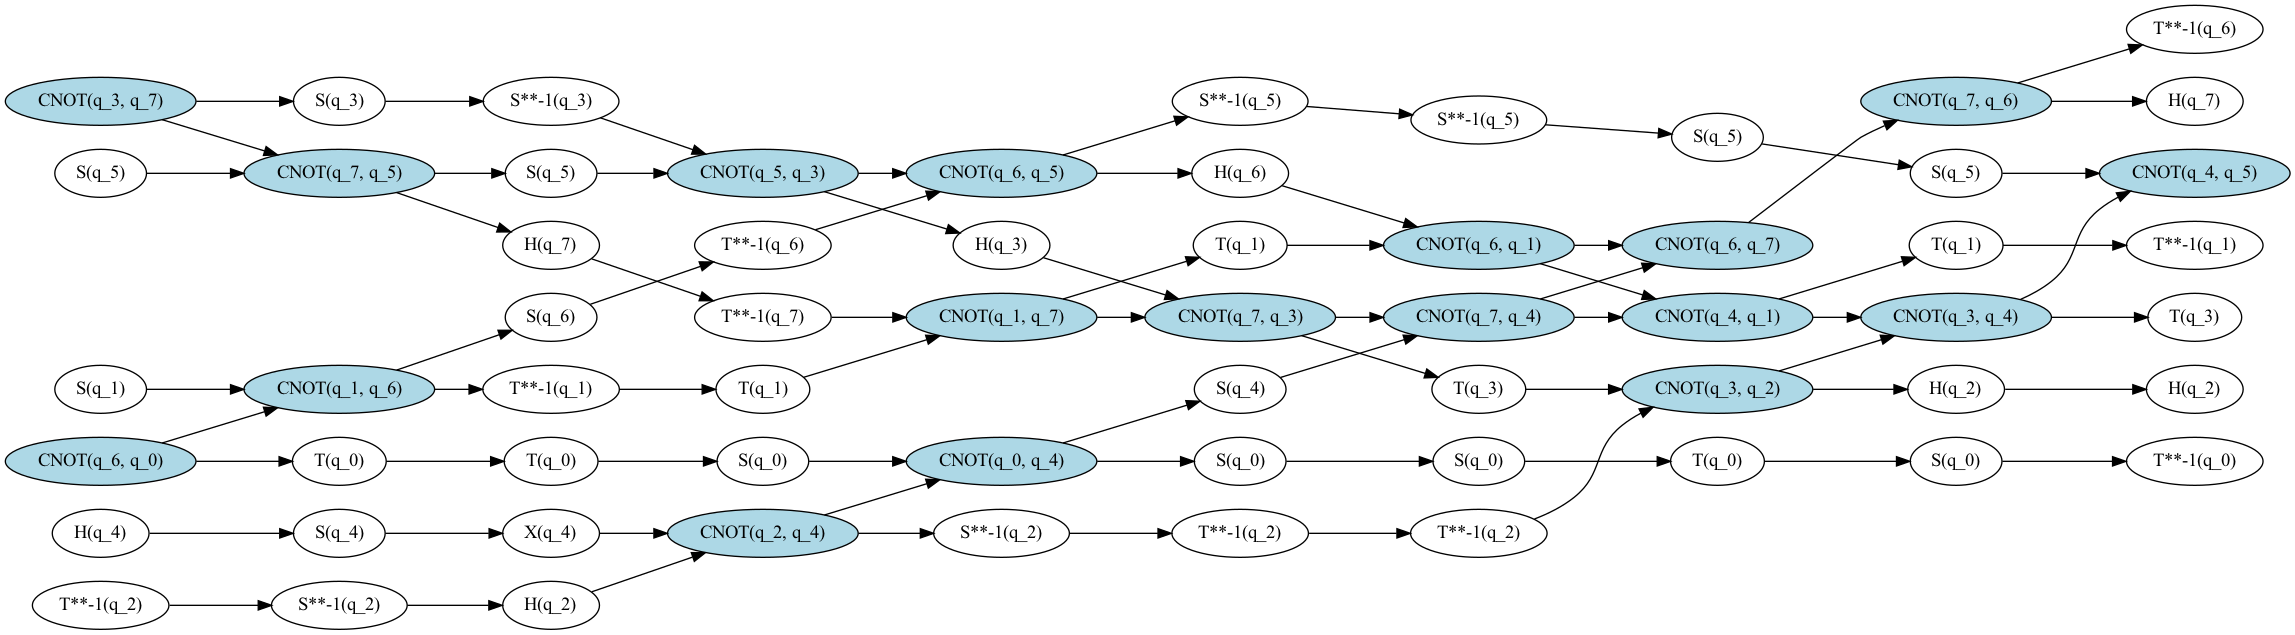

In [5]:
daqec.graphs.draw_circ_dag_graphviz(dag)

In [6]:
blocks = daqec.partition.seq_partition(circ)

In [8]:
blocks[0]

q_3: ───@───S───S^-1───
        │
q_7: ───X──────────────

In [9]:
circ1 = daqec.circuits.blocks_to_circuit(blocks)
circ1

┌──────┐   ┌─────┐          ┌─────┐   ┌──────┐   ┌─────┐   ┌──────┐   ┌──┐
q_0: ────────X──────T────────T───────S─────────────@──────S─────────S──────────T─────S───T^-1───
             │                                     │
q_1: ────S───┼──────────@────T^-1────T─────────────┼@─────T─────────────X───────X────T───T^-1───
             │          │                          ││                   │       │
q_2: ────T^-1┼──────S^-1┼────H───────@─────────S^-1┼┼─────T^-1──────T^-1┼──────X┼────H───H──────
             │          │            │             ││                   │      ││
q_3: ────@───┼──────S───┼────S^-1────┼───X─────H───┼┼─────────X─────T───┼──────@┼────@───T──────
         │   │          │            │   │         ││         │         │       │    │
q_4: ────┼───┼H─────S───┼────X───────X───┼─────────X┼─────S───┼─────────┼X──────@────X───@──────
         │   │          │                │          │         │         ││               │
q_5: ────┼───┼S─────X───┼────S───────────@─────X────┼─────S^-1┼─────S^-1┼┼─────S─────S───X──────
         │   │      │   │                      │    │         │         ││
q_6: ────┼───@──────┼───X────S───────T^-1──────@────┼─────H───┼─────────@┼─────@─────X───T^-1───
         │          │                               │         │          │     │     │
q_7: ────X──────────@────────H───────T^-1───────────X─────────@──────────@─────X─────@───H──────
        └──────┘   └─────┘          └─────┘   └──────┘   └─────┘   └──────┘   └──┘

In [10]:
cirq.testing.assert_allclose_up_to_global_phase(
    circ.unitary(),
    circ1.unitary(),
    atol=1e-8
)